### Breast cancer dataset.

In [6]:
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors
import numpy as np
%matplotlib inline

In [17]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [18]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.describe()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marg_adhesion             699 non-null int64
single_epith_cell_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chrom               699 non-null int64
norm_nucleoli             699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [19]:
# replacing all the missing values '?' with -99999
df.replace('?', -99999, inplace = True)

In [20]:
# since it doesn't have any meaning for data analysis
df.drop(['id'], 1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab3cd43b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fab36997ef0>]], dtype=object)

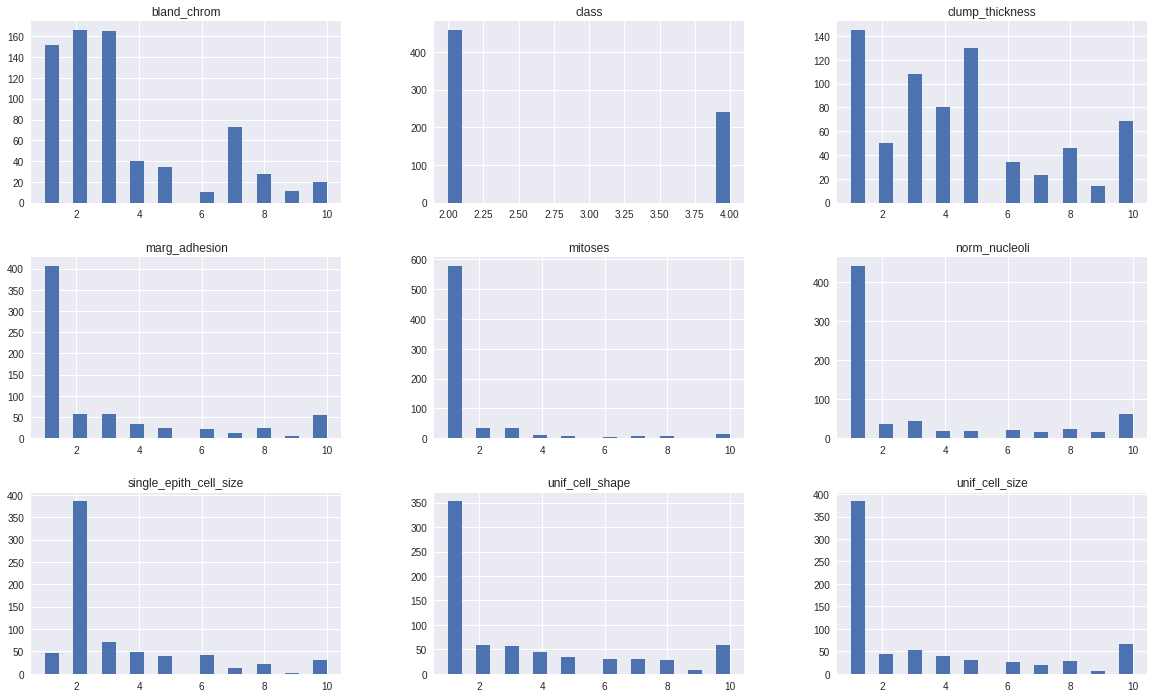

In [29]:
df.hist(bins = 20, figsize = (20, 12))

In [21]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
# using KNN

In [27]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
accuracy = knn.score(X_test, y_test)
accuracy

0.98571428571428577

In [25]:
example = np.array([4, 2, 1, 1, 1, 2, 3, 2, 1])

In [36]:
knn.predict(example)

/home/greed/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [28]:
# since we have incorrect number of features which are being compared with  actual training data.
# to correct the warning
example = example.reshape(1, -1)
knn.predict(example)

array([2])

In [44]:
# if we want to properly reshape our numpy array for prediction
example = example.reshape(len(example), -1)
knn.predict(example)

array([2])

In [46]:
from sklearn.grid_search import GridSearchCV

In [47]:
k_range = list(range(1, 31))

In [49]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [50]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [51]:
# view the complete results
grid.grid_scores_

[mean: 0.95708, std: 0.04102, params: {'n_neighbors': 1},
 mean: 0.94278, std: 0.03576, params: {'n_neighbors': 2},
 mean: 0.96280, std: 0.03046, params: {'n_neighbors': 3},
 mean: 0.96567, std: 0.02908, params: {'n_neighbors': 4},
 mean: 0.96853, std: 0.03018, params: {'n_neighbors': 5},
 mean: 0.96710, std: 0.03034, params: {'n_neighbors': 6},
 mean: 0.97139, std: 0.02759, params: {'n_neighbors': 7},
 mean: 0.96423, std: 0.03181, params: {'n_neighbors': 8},
 mean: 0.96710, std: 0.03231, params: {'n_neighbors': 9},
 mean: 0.96567, std: 0.03303, params: {'n_neighbors': 10},
 mean: 0.96853, std: 0.03277, params: {'n_neighbors': 11},
 mean: 0.96567, std: 0.03364, params: {'n_neighbors': 12},
 mean: 0.96567, std: 0.02978, params: {'n_neighbors': 13},
 mean: 0.96423, std: 0.03050, params: {'n_neighbors': 14},
 mean: 0.96567, std: 0.02978, params: {'n_neighbors': 15},
 mean: 0.96567, std: 0.03112, params: {'n_neighbors': 16},
 mean: 0.96423, std: 0.03050, params: {'n_neighbors': 17},
 mean:

In [52]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
# this shows what values should be used to assign the hyperparameters

0.9713876967095851
{'n_neighbors': 7}


In [55]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict(example)

array([2])

In [30]:
# Using SVM 
# Importing
from sklearn import svm
# Instantiating
support =  svm.SVC()
# Training the model
support.fit(X_train, y_train)
# Predict
accuracy = support.score(X_test, y_test)
accuracy

0.94999999999999996

In [31]:
example = example.reshape(1, -1)
support.predict(example)

array([2])